In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
mode = "train" # "test"
#filepath = os.getcwd() + "/train_ori/"
#filenameA = "div.bin"
#filenameB = "vz.bin"
#in_A_path = os.getcwd() + "/" + mode  + "_ori/div.bin"
#in_B_path = os.getcwd() +  "/" + mode  + "_ori/vz.bin"

in_A_path = os.getcwd() + "/" + mode  + "_ori/curl.bin"
in_B_path = os.getcwd() +  "/" + mode  + "_ori/vx.bin"

out_A_path =  os.getcwd() + "/" + mode  + "_split/A01.png"
out_B_path =  os.getcwd() + "/" + mode  + "_split/B01.png"
if not os.path.exists(os.path.split(out_A_path)[0]):
    os.makedirs(os.path.split(out_A_path)[0])

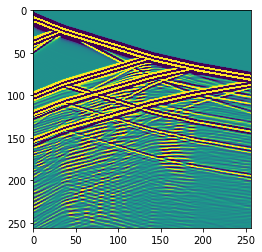

In [3]:
#data = []
nt = 4000
nr = 301
out_data = np.empty((nt,nr))
nx_out = 276
nz_out = 276

# A
FA = open(in_A_path, "rb")
for tt in range(nt):
    for rr in range(nr):
        data = FA.read(4)
        data_float = struct.unpack("f", data)[0]
        out_data[tt][rr] = data_float
 #np.shape(out_data)   # (4000,301)
cut_data = out_data[0:4000, 8:301]
#pic = plt.imshow(cut_data,vmin=-0.00000001, vmax = 0.00000001, extent=[0, 256, 256, 0])#, shape=[100,100])
plt.imsave(out_A_path, cut_data, vmin=-0.00000001, vmax = 0.00000001)
#plt.imsave('A01.png', cut_data, vmin=-0.00000001, vmax = 0.00000001)
Image.open(out_A_path).resize((nx_out, nz_out), Image.ANTIALIAS).save(out_A_path)

# B
FB = open(in_B_path, "rb")
for tt in range(nt):
    for rr in range(nr):
        data = FB.read(4)
        data_float = struct.unpack("f", data)[0]
        out_data[tt][rr] = data_float
 #np.shape(out_data)   # (4000,301)
cut_data = out_data[0:4000, 8:301]
pic = plt.imshow(cut_data,vmin=-0.00000001, vmax = 0.00000001, extent=[0, 256, 256, 0])#, shape=[100,100])
plt.imsave(out_B_path, cut_data, vmin=-0.00000001, vmax = 0.00000001)
Image.open(out_B_path).resize((nx_out, nz_out), Image.ANTIALIAS).save(out_B_path)

In [4]:
# mergePic
from PIL import Image
import os
NX = nx_out*2 #276*3 # 200
NZ = nz_out #276 # 100
fileNum = 0

ch_in = os.path.split(out_A_path)[0] 
ch_out = os.getcwd() + "/" + mode # +train" 

if not os.path.exists(ch_out):
        os.makedirs(ch_out)

pathA = ch_in + "/A01.png"
pathB = ch_in + "/B01.png"
outname = ch_out + "/01.png"
arr = [pathA, pathB]

toImage = Image.new('L', (NX,NZ))
for i in range(2):
    fromImge = Image.open(arr[i])
    # loc = ((i % 2) * 200, (int(i/2) * 200))
    #loc = ((int(i/2) * 200), (i % 2) * 200))
    loc = (((i) * int(NX / 2)), 0)
    #print(loc)
    toImage.paste(fromImge, loc)
toImage.save(outname)

In [5]:
#%hist -f mkTrain_single.py